In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib_inline

In [461]:
# Reading the CSV file containing Africa's food production data for the years 2004 to 2013
prod = pd.read_csv("Africa Food Production (2004 - 2013).csv")

# Reading the CSV file containing Africa's food supply data for the years 2004 to 2013
supp = pd.read_csv("Africa Food Supply (2004 - 2013).csv")

In [462]:
# Generating descriptive statistics 

prod.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [463]:
# checking for null

prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [464]:
# checking for null

supp.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [465]:
# checking for duplicated

prod.duplicated().sum()

0

In [466]:
# checking for duplicated

supp.duplicated().sum()

0

In [467]:
# changing year column to datetime

prod['Year'] =pd.to_datetime(prod['Year'], format = '%Y')

In [468]:
prod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  23110 non-null  object        
 1   Item     23110 non-null  object        
 2   Year     23110 non-null  datetime64[ns]
 3   Value    23110 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 722.3+ KB


In [469]:
# Grouping the 'prod' DataFrame by 'Country', 'Item', and 'Year' columns and aggregating the 'Value' column by summing


grouped_prod  = prod.groupby(['Country', 'Item', 'Year'])['Value'].sum().reset_index()
grouped_prod

,Country,Item,Year,Value
0,Algeria,Apples and products,2004-01-01,165
1,Algeria,Apples and products,2005-01-01,200
2,Algeria,Apples and products,2006-01-01,283
3,Algeria,Apples and products,2007-01-01,190
4,Algeria,Apples and products,2008-01-01,261
...,...,...,...,...
23105,Zimbabwe,Wine,2009-01-01,2
23106,Zimbabwe,Wine,2010-01-01,2
23107,Zimbabwe,Wine,2011-01-01,2
23108,Zimbabwe,Wine,2012-01-01,2


In [470]:
# Creating a new DataFrame 'new_group' by grouping 'grouped_prod' further, summing 'Value' for each unique combination of 'Country' and 'Year'


new_group = pd.DataFrame(grouped_prod.groupby(['Country', 'Year'])['Value'].sum()).reset_index()

new_group

,Country,Year,Value
0,Algeria,2004-01-01,15536
1,Algeria,2005-01-01,15667
2,Algeria,2006-01-01,16417
3,Algeria,2007-01-01,14763
4,Algeria,2008-01-01,13841
...,...,...,...
445,Zimbabwe,2009-01-01,5754
446,Zimbabwe,2010-01-01,6777
447,Zimbabwe,2011-01-01,7551
448,Zimbabwe,2012-01-01,8173


In [471]:
new_group.shape

(450, 3)

#### `A Trend of Production per Country`


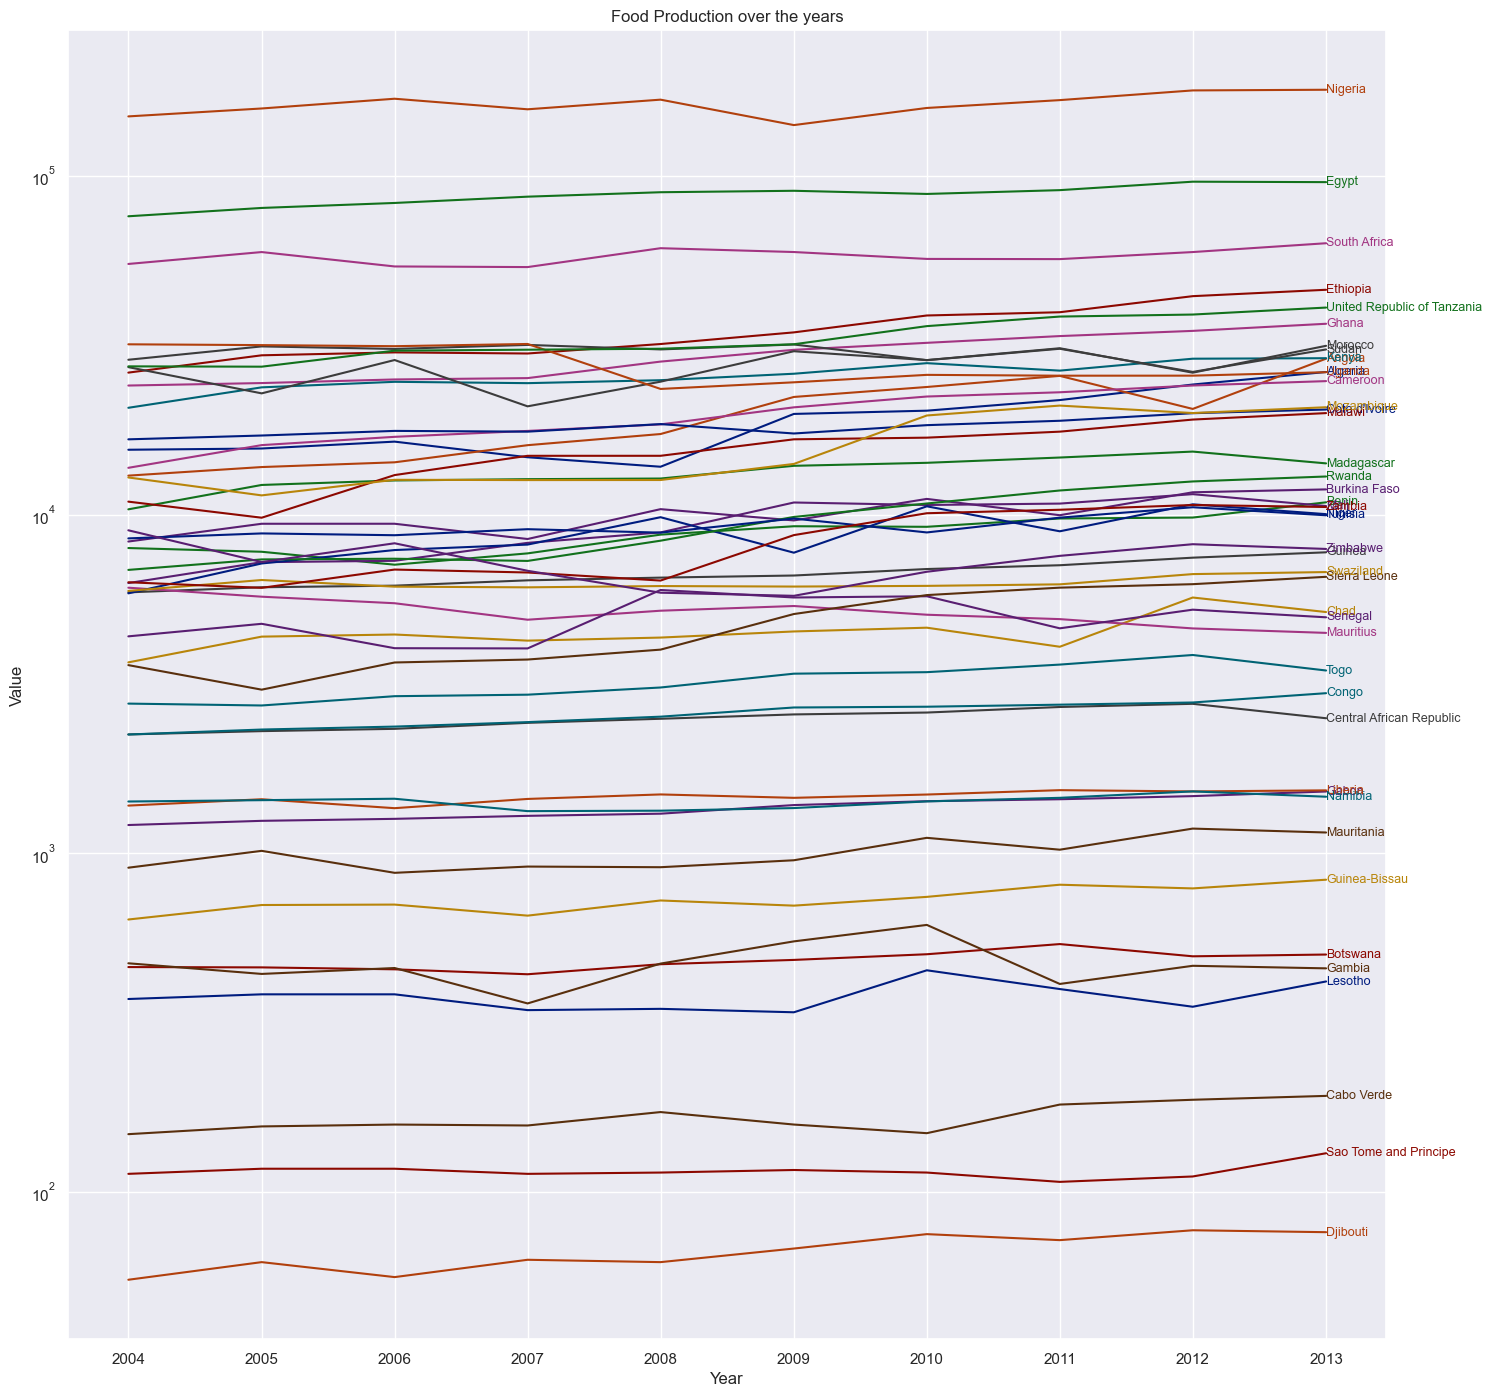

In [472]:
# Setting the figure size for better visualization
sns.set(rc={'figure.figsize': (17, 17)})

# Creating a line plot using Seaborn to visualize food production over the years, grouped by country
food_prod = sns.lineplot(x='Year', y='Value', hue='Country', palette='dark', data=new_group, legend=False)

# Setting the y-axis to a logarithmic scale for better representation of data with a wide range
food_prod.set(yscale='log')

# Adding a title to the plot
plt.title("Food Production over the years")

# Adding country names on the lines for clarity
for line, label in zip(food_prod.lines, new_group['Country'].unique()):
    x_data, y_data = line.get_xydata().T
    if x_data.size > 0:
        plt.text(x_data[-1], y_data[-1], label, color=line.get_color(), fontsize=9, ha='left', va='center')

# Displaying the plot
plt.show()


`Observations`

1. It is evident that Nigeria, Egypt, and South Africa have consistently held the top three positions in food production over the years.

2. Conversely, Djibouti, Sao Tome and Principe, and Cabo Verde have consistently ranked among the bottom three countries in terms of food production in Africa over the years.

3. The substantial food production achievements in Nigeria, Egypt, and South Africa can be attributed to a synergistic mix of favorable climatic conditions, sophisticated agricultural practices, supportive governmental policies, ongoing technological advancements, and well-established infrastructure.

4. The comparatively lower levels of food production in Djibouti, Sao Tome and Principe, and Cabo Verde can be ascribed to a combination of geographical constraints, limited agricultural practices, and challenges in infrastructure development.

In [473]:
# Converting the 'Year' column in the 'new_group' DataFrame to datetime format and extracting the year

new_group['Year'] = pd.to_datetime(new_group['Year'], format='%Y-%m-%d %H:%M:%S').dt.year




#### <span style="color:cyan">DELIVARABLE: Distribution of Food Production Over the Years</span>


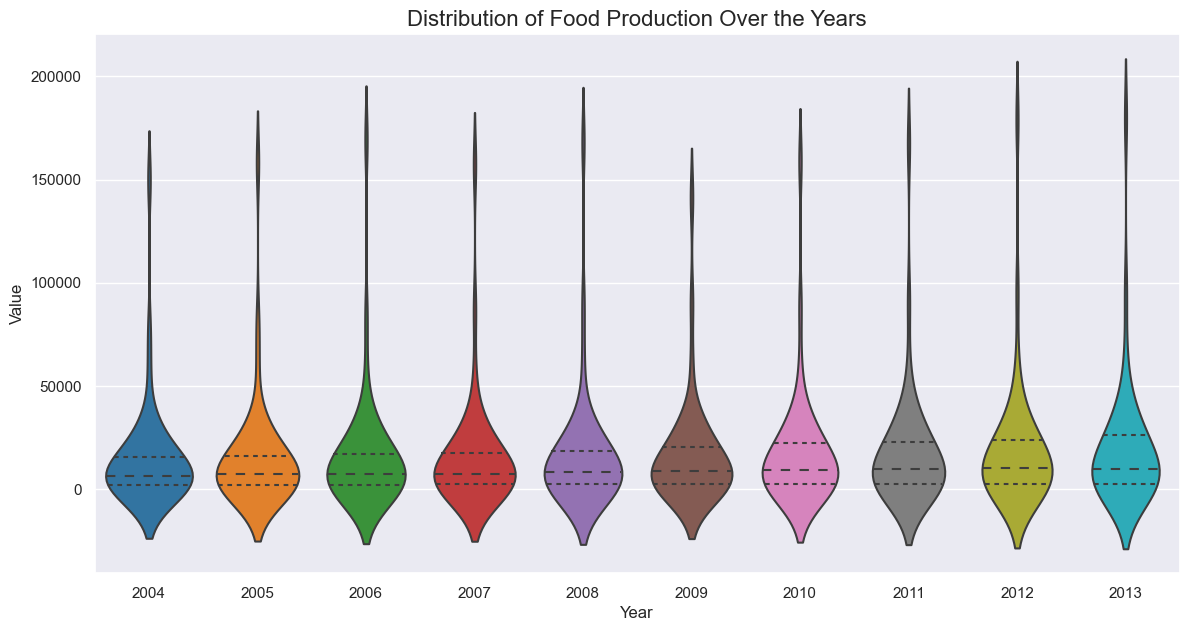

In [474]:

sns.set(rc={'figure.figsize': (14, 7)})

# Create a violin plot 

ax = sns.violinplot(x='Year', y='Value', data=new_group, palette='tab10', inner='quartile')
plt.title('Distribution of Food Production Over the Years', fontsize=16)

plt.show()

`Observation`

1. Increasing Trend: There is a general upward trend in food production from 2004 to 2013, with values consistently rising each year.

2. Steady Growth: The annual increase in food production is relatively steady, showing a gradual rise without significant fluctuations.

3. Notable Increase in 2010: A significant increase in food production is observed in 2010, where the value jumps notably compared to the previous years.

4. Peak in 2013: The highest recorded food production value is in the year 2013, reaching 872,571. This could indicate a peak in production for that period.

5. Minor Fluctuation in 2008: While there is a slight increase in 2009 compared to the previous year, it is worth noting that this is followed by a more substantial increase in 2010, suggesting resilience in the production system.

6. Consistency Post-2010: After the remarkable increase in 2010, the subsequent years (2011-2013) maintain a consistent growth pattern without any sharp spikes or declines.


#### <span style="color:cyan">A Trend of Supply per Country</span>


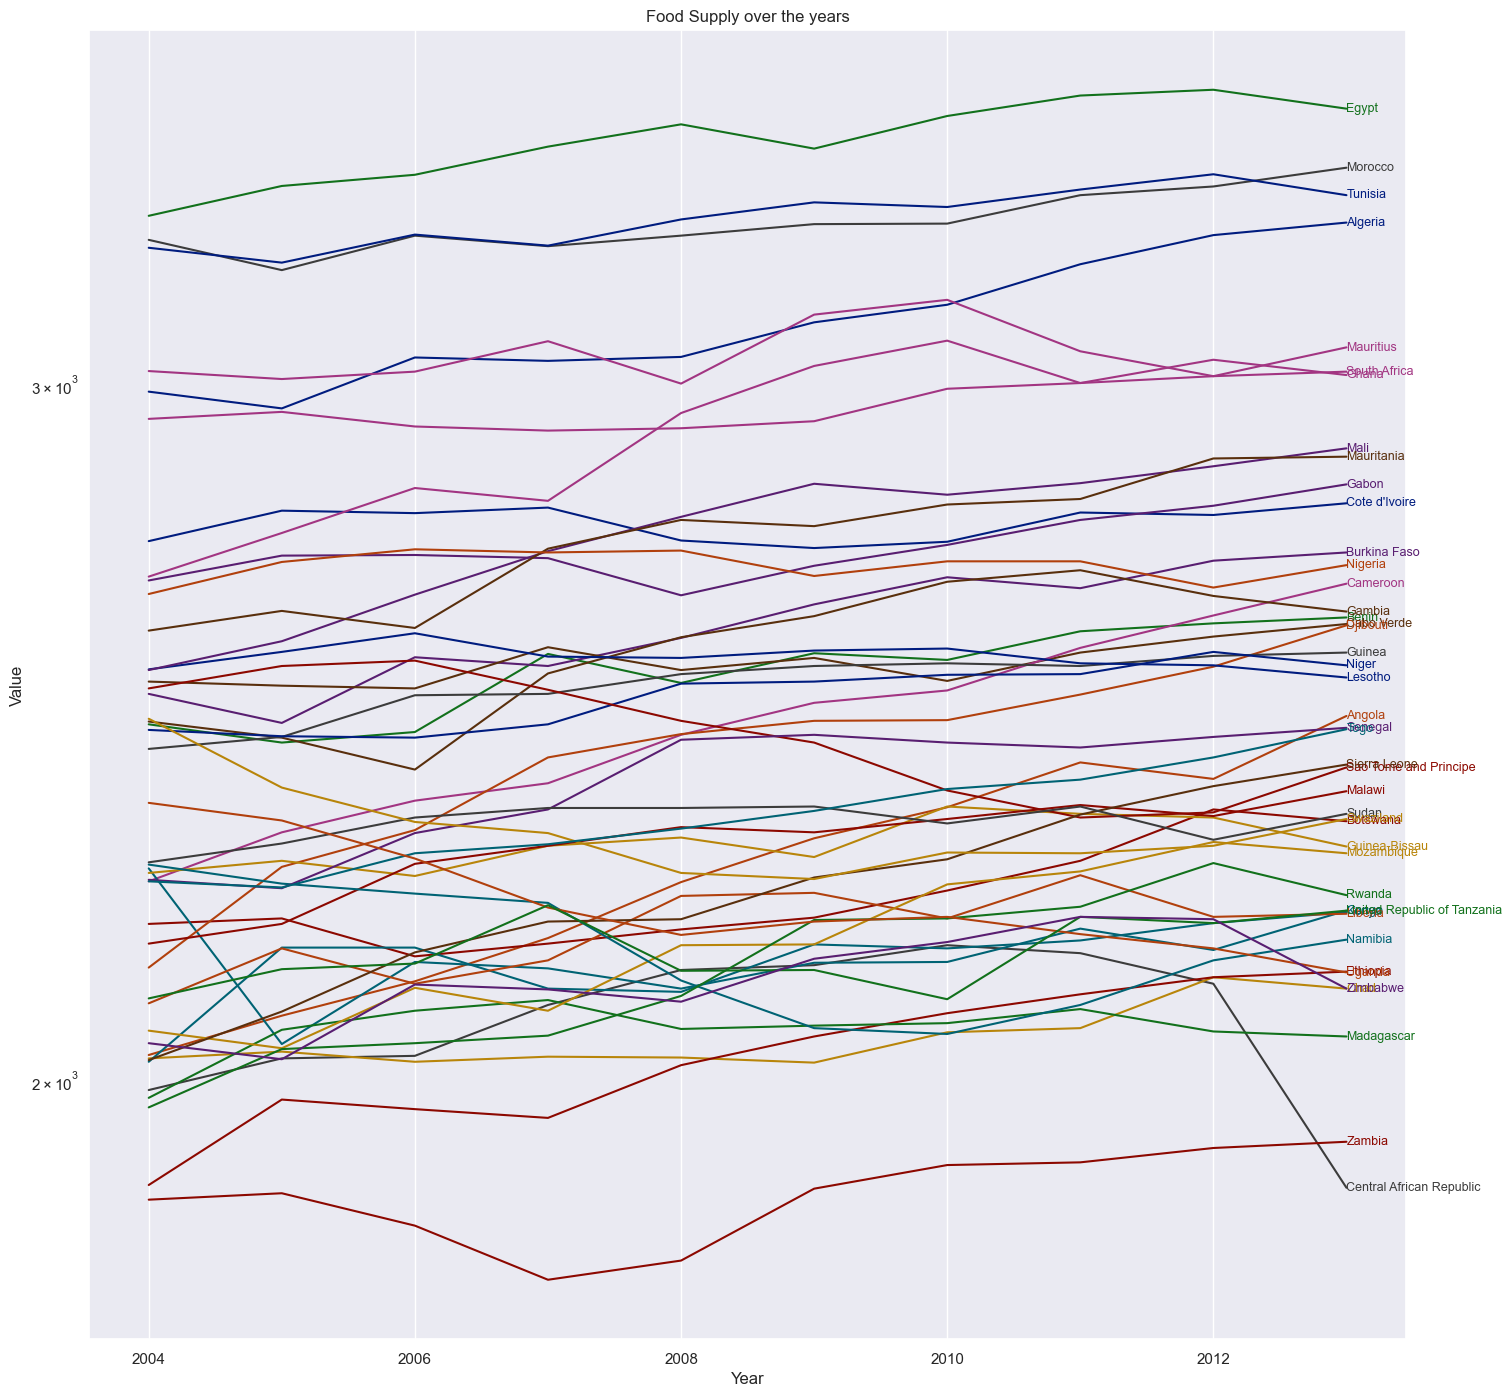

In [475]:
sns.set(rc = {'figure.figsize':(17,17)})
food_prod = sns.lineplot(x  ='Year', y = 'Value', hue = 'Country', palette = 'dark', data = supp, legend=False)
food_prod.set(yscale = 'log')
plt.title("Food Supply over the years")
# Add country names on the lines
for line, label in zip(food_prod.lines, new_group['Country'].unique()):
    x_data, y_data = line.get_xydata().T
    if x_data.size > 0:
        plt.text(x_data[-1], y_data[-1], label, color=line.get_color(), fontsize=9, ha='left', va='center')

plt.show()

`Observation`

1. Over the years, Egypt, Morocco, and Tunisia have consistently dominated the African food supply landscape, capitalizing on favorable geographical conditions, sophisticated agricultural methods, governmental backing, and advancements in technology.

2. Egypt's adept utilization of Nile River resources, Morocco's dedication to the modernization of agriculture, and Tunisia's strategic policies combine to establish these nations as pivotal players in Africa's food supply.

3. In contrast, the Central African Republic, Zambia, and Madagascar encounter hurdles in ensuring a stable food supply, with potential influences stemming from  economic hardships, fluctuations in climate, and limited accessibility to contemporary farming practices.



#### <span style="color:cyan">Food Supply Across the Years</span>


In [ ]:
food_supp = pd.DataFrame(supp.groupby(['Year'])['Value'].sum().reset_index())


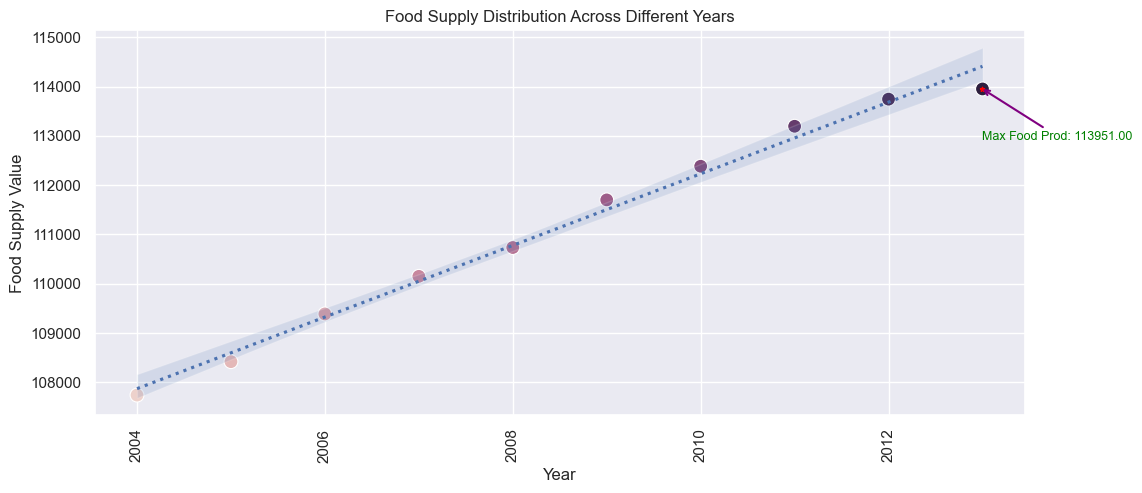

In [459]:
# Setting the figure size for better visualization
plt.figure(figsize=(12, 5))

# Creating a scatter plot to visualize food supply distribution over different years
sns.scatterplot(x='Year', y='Value', data=food_supp, color='green', hue='Year', s=100, legend=False)

# Adding a regression line to show the trend
sns.regplot(x='Year', y='Value', data=food_supp, scatter=False, line_kws={'linestyle': 'dotted'})

# Finding the maximum value and corresponding year in the food supply data
max_value = food_supp['Value'].max()
max_year = food_supp.loc[food_supp['Value'].idxmax(), 'Year']

# Annotating each data point with its respective year
for year, value in food_supp[['Year', 'Value']].values:
    plt.annotate(year, xy=(value, 0.01), xytext=(value, 0.1), arrowprops={'arrowstyle': '->', 'lw': 1.5, 'color': 'purple'})

# Highlighting the point with the maximum value in red and annotating it
plt.scatter(max_year, max_value, color='red', s=10, marker='*', label='Max Food Production')
plt.annotate(f'Max Food Prod: {max_value:.2f}', 
             xy=(max_year, max_value), 
             xytext=(max_year, max_value - 0.009 * max_value),
             arrowprops={'arrowstyle': '->', 'lw': 1.5, 'color': 'purple', 'shrinkA': 0.1, 'shrinkB': 0.1},
             color='green', fontsize=9)

# Adding title and labels to the plot
plt.title('Food Supply Distribution Across Different Years')
plt.xlabel('Year')
plt.ylabel('Food Supply Value')
plt.xticks(rotation=90)
plt.grid(True)

# Displaying the plot
plt.show()


`Observation`
1. The dataset spans a decade, from 2004 to 2013, revealing an overall upward trend in food supply values.

2. Annual increases in food supply are generally incremental, with a notable surge observed between 2008 and 2009.

3. The year 2013 shows a modest increase compared to previous years, with a smaller increment.

4. Despite variations in annual growth, the cumulative trend emphasizes sustained positive growth in food supply.

5. The data reflects stability without pronounced fluctuations, indicating a consistent and progressive food supply scenario.

6. Further analysis is needed to understand specific contributing factors, such as advancements in agriculture or government initiatives, driving the observed trends.



#### <span style="color:cyan">Deliverable: Average and median food production, the outliers, Quartile and interquartile ranges</span>


In [278]:
# Calculate Average food production

AVG_country = pd.DataFrame(new_group.groupby(['Country'])['Value'].mean().reset_index())
AVG_country.head()

,Country,Value
0,Algeria,18865.0
1,Angola,19549.9
2,Benin,8807.2
3,Botswana,480.8
4,Burkina Faso,10012.9


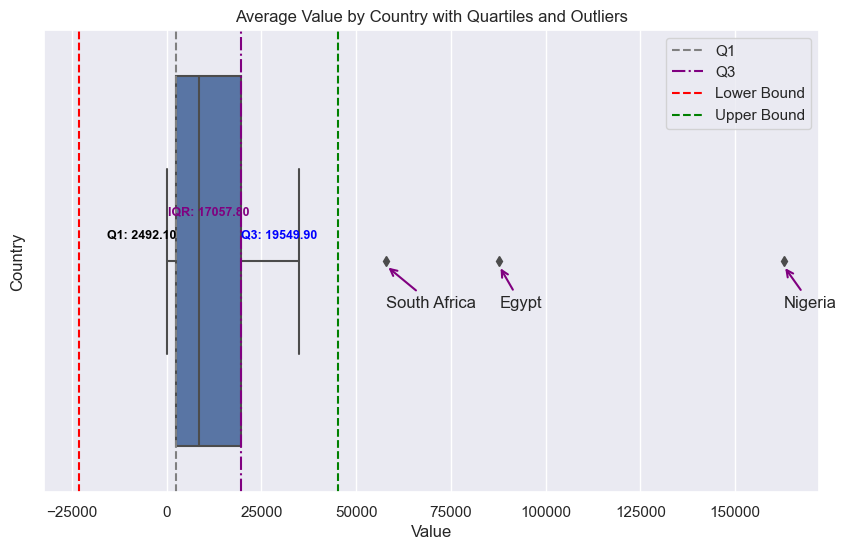

In [397]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='Value', data=AVG_country)

# Add quartile and interquartile range annotations
Q1 = AVG_country['Value'].quantile(0.25)
Q3 = AVG_country['Value'].quantile(0.75)
IQR = Q3 - Q1

plt.axvline(Q1, color='gray', linestyle='--', label='Q1')
plt.axvline(Q3, color='purple', linestyle='-.', label='Q3')
plt.axvline(Q1 - 1.5 * IQR, color='red', linestyle='--', label='Lower Bound')
plt.axvline(Q3 + 1.5 * IQR, color='green', linestyle='--', label='Upper Bound')

# Add outlier annotations
outliers = AVG_country[(AVG_country['Value'] > Q3 + 1.5 * IQR) | (AVG_country['Value'] < Q1 - 1.5 * IQR)]

for country, value in outliers[['Country', 'Value']].values:
    plt.annotate(country, xy=(value, 0.01), xytext=(value, 0.1), arrowprops={'arrowstyle': '->', 'lw': 1.5, 'color': 'purple'})
    
# Annotate quartile and interquartile range values with smaller font size
plt.text(Q1, -0.05, f'Q1: {Q1:.2f}', color='black', ha='right', fontsize=9, fontweight='bold')
plt.text(Q3, -0.05, f'Q3: {Q3:.2f}', color='blue', ha='left', fontsize=9, fontweight='bold')
plt.text((Q1 + Q3) / 2, -0.1, f'IQR: {IQR:.2f}', color='purple', ha='center', fontsize=9, fontweight='bold')

# Add labels and title
plt.title('Average Value by Country with Quartiles and Outliers')
plt.xlabel('Value')
plt.ylabel('Country')
plt.legend()
plt.show()

In [310]:
# Calculate Median food production

MED_country = pd.DataFrame(new_group.groupby(['Country'])['Value'].median().reset_index())
MED_country.head()

,Country,Value
0,Algeria,18118.5
1,Angola,18896.5
2,Benin,8961.5
3,Botswana,477.0
4,Burkina Faso,9780.5


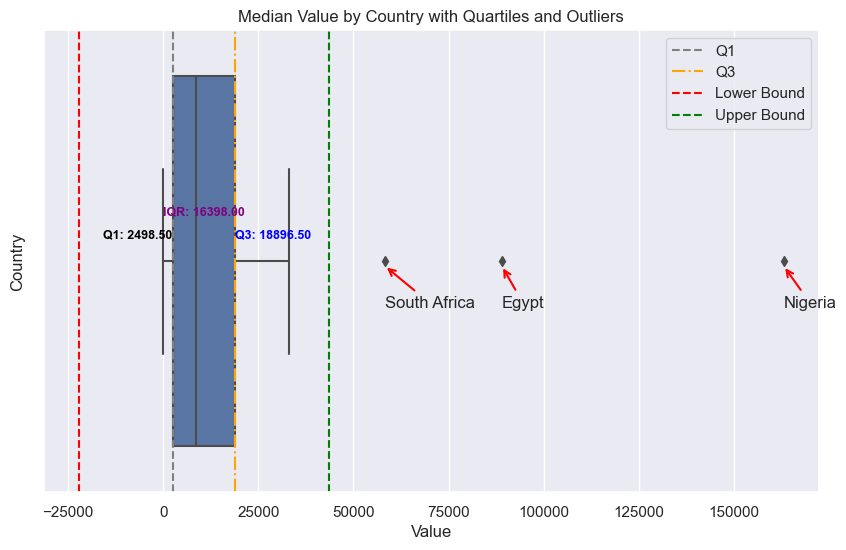

In [396]:

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='Value', data=MED_country)

# Add quartile and interquartile range annotations
Q1 = MED_country['Value'].quantile(0.25)
Q3 = MED_country['Value'].quantile(0.75)
IQR = Q3 - Q1

plt.axvline(Q1, color='gray', linestyle='--', label='Q1')
plt.axvline(Q3, color='orange', linestyle='-.', label='Q3')
plt.axvline(Q1 - 1.5 * IQR, color='red', linestyle='--', label='Lower Bound')
plt.axvline(Q3 + 1.5 * IQR, color='green', linestyle='--', label='Upper Bound')

# Add outlier annotations
outliers1 = MED_country[(MED_country['Value'] > Q3 + 1.5 * IQR) | (MED_country['Value'] < Q1 - 1.5 * IQR)]

for country, value in outliers1[['Country', 'Value']].values:
    plt.annotate(country, xy=(value, 0.01), xytext=(value, 0.1), arrowprops={'arrowstyle': '->', 'lw': 1.5, 'color': 'red'})

# Annotate quartile and interquartile range values with smaller font size
plt.text(Q1, -0.05, f'Q1: {Q1:.2f}', color='black', ha='right', fontsize=9, fontweight='bold')
plt.text(Q3, -0.05, f'Q3: {Q3:.2f}', color='blue', ha='left', fontsize=9, fontweight='bold')
plt.text((Q1 + Q3) / 2, -0.1, f'IQR: {IQR:.2f}', color='purple', ha='center', fontsize=9, fontweight='bold')
# Add labels and title
plt.title('Median Value by Country with Quartiles and Outliers')
plt.xlabel('Value')
plt.ylabel('Country')
plt.legend()
plt.show()



`Observations`


1. **Egypt:**
   - The values for Egypt are consistent between the median and mean, indicating that it is around the center of the distribution.

2. **Nigeria:**
   - Nigeria has a relatively high value compared to the other countries.
   - In both cases (median and mean), Nigeria appears as an outlier, extending beyond the "whiskers" of the boxplot.
   - This suggests that Nigeria has a higher value compared to most other countries in the dataset.

3. **Overall Dataset:**
   - The boxplot provides a visual representation of the spread of values, central tendency, and the presence of outliers in the dataset.
   - The observations for Egypt, Nigeria, and South Africa are a subset of the overall distribution of 45 countries.
   - Most countries likely fall within the IQR, with Egypt and South Africa representing typical values, while Nigeria stands out as an extreme value.
   - The boxplot reveals that the upper whisker (Q3 whisker) is notably longer than the lower whisker (Q1 whisker).
   - This indicates a greater variability or dispersion in the higher values of the 'Value' variable among the countries.
   - The elongated upper whisker suggests the presence of potential outliers or a skewed distribution toward higher values.




#### <span style="color:cyan">Deliverable: comparison between average food consumption and production for each year</span>


In [353]:
AVG_year_prod = pd.DataFrame(new_group.groupby(['Year'])['Value'].mean().reset_index())
AVG_year_supp = pd.DataFrame(supp.groupby(['Year'])['Value'].mean().reset_index())


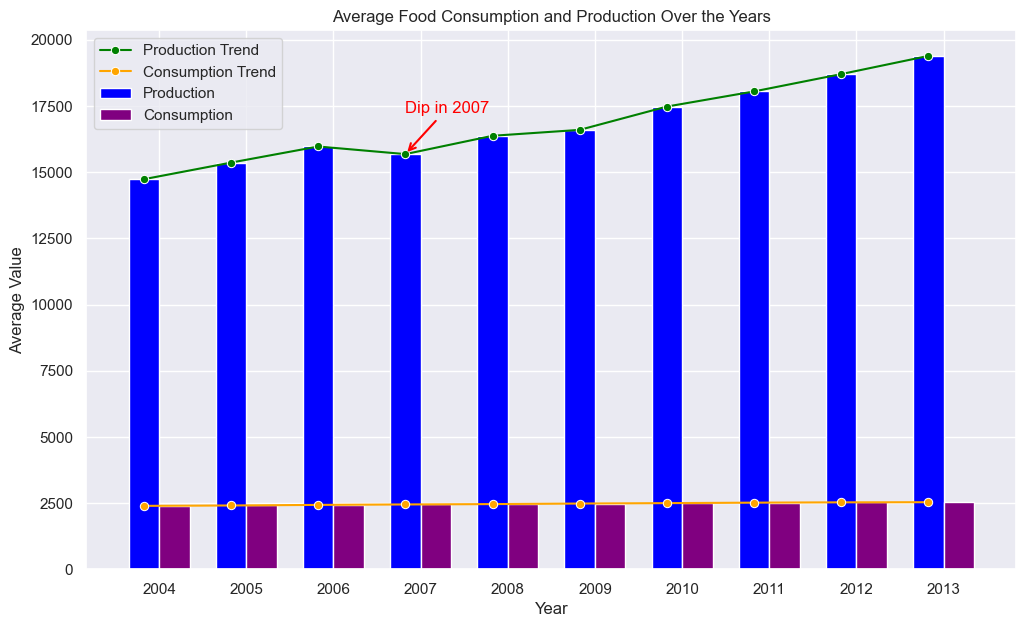

In [369]:


# Merge the two datasets on the 'Year' column
merged_data = pd.merge(AVG_year_prod, AVG_year_supp, on='Year', suffixes=('_prod', '_supp'))

# Set the size of the plot
plt.figure(figsize=(12, 7))

# Create a grouped bar plot
bar_width = 0.35
bar_positions_prod = merged_data['Year']
bar_positions_supp = merged_data['Year'] + bar_width

plt.bar(bar_positions_prod, merged_data['Value_prod'], width=bar_width, label='Production', color='blue')
plt.bar(bar_positions_supp, merged_data['Value_supp'], width=bar_width, label='Consumption', color='purple')

# Add annotation for the dip in 2007
dip_2007_value = merged_data.loc[merged_data['Year'] == 2007, 'Value_prod'].values[0]
plt.annotate('Dip in 2007', 
             xy=(2007, dip_2007_value), 
             xytext=(2007, dip_2007_value + 0.1 * dip_2007_value),
             arrowprops={'arrowstyle': '->', 'lw': 1.5, 'color': 'red'},color = 'red')

# Create a line plot for production
sns.lineplot(x='Year', y='Value_prod', data=merged_data, marker='o', label='Production Trend', color='green')

# Create a line plot for consumption
sns.lineplot(x='Year', y='Value_supp', data=merged_data, marker='o', label='Consumption Trend', color='orange')
# Add labels and title
plt.title('Average Food Consumption and Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(bar_positions_prod + bar_width / 2, merged_data['Year'])
plt.show()


`Observation`


1. **Production and Consumption Trends:**
   - Both production and consumption values show an increasing trend over the years.
   - Production has consistently increased from 2004 to 2013, reaching a peak in 2013.
   - Consumption also demonstrates an upward trend.

2. **Production vs. Consumption:**
   - The production values are significantly higher than consumption values each year.
   - This suggests that, on average, the total food production is higher than the amount consumed, indicating a surplus.

3. **Yearly Fluctuations:**
   - While both production and consumption show an overall increasing trend, there are some fluctuations from year to year.
   - Notably, there is a dip in production around 2007, followed by a recovery in subsequent years.

4. **Consistent Gap:**
   - The gap between production and consumption remains relatively consistent over the years.
   - This suggests that the surplus in production is relatively stable and not influenced by significant year-to-year variations.

5. **Increasing Discrepancy:**
   - The difference between production and consumption increases over the years.
   - This widening gap could be due to factors such as changes in agricultural practices, technological advancements, or shifts in food distribution and consumption patterns.

6. **Sustainable Production:**
   - The increasing trend in production could indicate efforts to meet the growing demand for food.
 

